# Time series analysis (MSAP4-02)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import star_privateer as sp
import plato_msap4_demonstrator_datasets.plato_sim_dataset as plato_sim_dataset

In [3]:
sp.__version__

'1.2.0'

## K2: Preprocessing

This first part include preprocessing tasks that are not actually included in MSAP4-02 but are useful for the subsequent analysis.

In [4]:
t, s0, dt = sp.load_k2_example ()

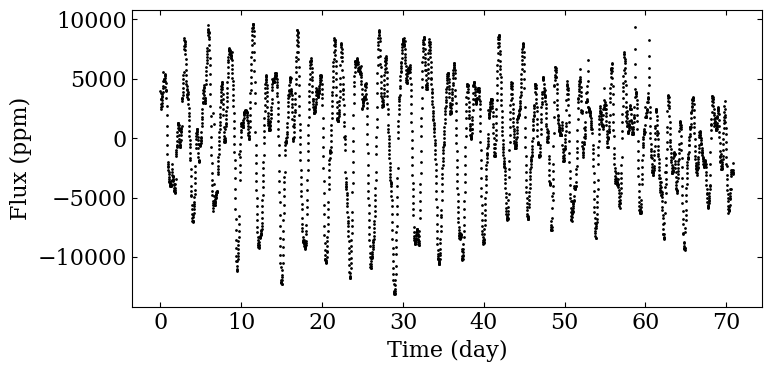

In [5]:
fig, ax = plt.subplots (1, 1, figsize=(8,4))

ax.scatter (t[s0!=0]-t[0], s0[s0!=0], color='black', 
            marker='o', s=1)

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

fig.tight_layout ()

plt.savefig ('figures/k2_lc.png', dpi=300)

In [6]:
pcutoff = 60
pthresh = 60

## K2: Rotation period analysis

In the next step, we compute the ACF and we analyse the characteristic periodicities obtained from the function, considering only periods below $P_\mathrm{cutoff}$.

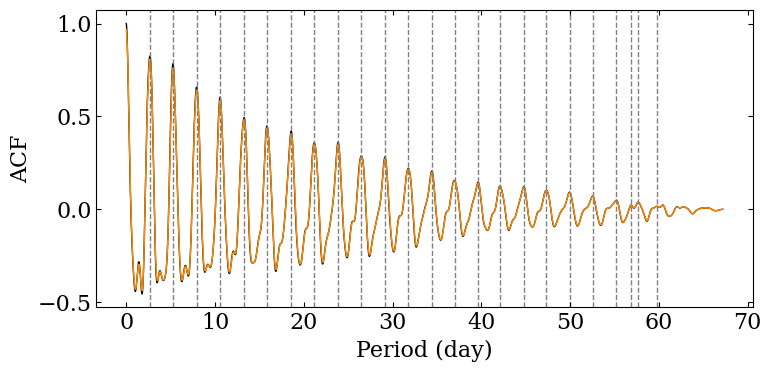

In [7]:
p_acf, acf = sp.compute_acf (s0, dt, normalise=True)
(_, _, _, _, 
prots, hacf, gacf,
acf_smooth) = sp.find_period_acf (p_acf, acf, pcutoff=pcutoff,
                                  return_smoothed_acf=True)
fig = sp.plot_acf (p_acf, acf, prot=prots, 
                   acf_additional=acf_smooth,
                   color_additional="darkorange", 
                   filename='figures/acf_k2.png')

We can take a look at the values we have extracted from the ACF. Most often, the rotation period can be linked to the first value of the ``prots`` array.

In [8]:
prots[0], hacf[0], gacf[0]

(2.6765510971308686, 1.219105626528322, 0.8085280511689089)

Finally we create the intermediate data product.

In [9]:
IDP_SAS_ACF_FILT_TIMESERIES = np.c_[p_acf, acf]
IDP_SAS_PROT_TIMESERIES = np.c_[prots, np.full (prots.size, -1), np.full (prots.size, -1),
                                hacf, gacf, np.arange (prots.size)+1]
np.savetxt ('data_products/IDP_SAS_PROT_TIMESERIES_K2.dat', 
            IDP_SAS_PROT_TIMESERIES)
np.savetxt ('data_products/IDP_SAS_ACF_FILT_TIMESERIES_K2.dat', 
            IDP_SAS_ACF_FILT_TIMESERIES)
df = pd.DataFrame (data=IDP_SAS_PROT_TIMESERIES)
df

0    1    2         3         4     5
0    2.676551 -1.0 -1.0  1.219106  0.808528   1.0
1    5.271375 -1.0 -1.0  1.142988  0.761694   2.0
2    7.947927 -1.0 -1.0  0.984593  0.642715   3.0
3   10.583614 -1.0 -1.0  0.910175  0.586043   4.0
4   13.280597 -1.0 -1.0  0.746789  0.483461   5.0
5   15.875421 -1.0 -1.0  0.743666  0.437643   6.0
6   18.592836 -1.0 -1.0  0.717921  0.408310   7.0
7   21.187660 -1.0 -1.0  0.642279  0.351740   8.0
8   23.884643 -1.0 -1.0  0.621054  0.350691   9.0
9   26.499899 -1.0 -1.0  0.533378  0.282954  10.0
10  29.156018 -1.0 -1.0  0.508112  0.272964  11.0
11  31.791706 -1.0 -1.0  0.426513  0.215709  12.0
12  34.427394 -1.0 -1.0  0.379729  0.199663  13.0
13  36.981355 -1.0 -1.0  0.304468  0.152380  14.0
14  39.637474 -1.0 -1.0  0.267633  0.141080  15.0
15  42.109708 -1.0 -1.0  0.232925  0.122093  16.0
16  44.786260 -1.0 -1.0  0.219537  0.117616  17.0
17  47.340221 -1.0 -1.0  0.192786  0.100213  18.0
18  49.955477 -1.0 -1.0  0.178725  0.089382  19.0
19  52.550301 -1.0 -1.0  0.154197  0.068293  20.0
20  55.226852 -1.0 -1.0  0.123732  0.046698  21.0
21  56.902250 -1.0 -1.0  0.051635  0.020629  22.0
22  57.678655 -1.0 -1.0  0.064155  0.037136  23.0
23  59.783118 -1.0 -1.0  0.040878  0.015503  24.0

In [10]:
df.to_latex (buf='data_products/idp_msap4_02_idp_prot_timeseries.tex', 
             formatters=['{:.2f}'.format, '{:.0f}'.format, '{:.0f}'.format,
                         '{:.2f}'.format, '{:.2f}'.format, '{:.0f}'.format,],  
             index=False, header=False)

Note that, due to the short length of this light curve, we do not show for this first case the analysis of long term modulations.

## PLATO simulation: Preprocessing

This first part include preprocessing tasks that are not actually included in MSAP4-02 but are useful for the subsequent analysis.

In [11]:
filename = sp.get_target_filename (plato_sim_dataset, 
                                   '040', filetype='csv')
t, s0, dt = sp.load_resource (filename)

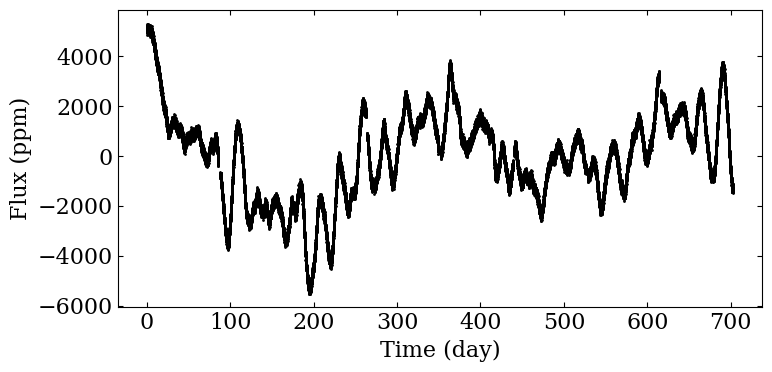

In [12]:
fig, ax = plt.subplots (1, 1, figsize=(8,4))

ax.scatter (t[s0!=0]-t[0], s0[s0!=0], color='black', 
            marker='o', s=1)

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

fig.tight_layout ()


plt.savefig ('figures/plato_lc.png', dpi=300)

In [13]:
s = sp.preprocess (t, s0, cut=60)
pcutoff = 60
pthresh = 60

## PLATO simulation: Rotation period analysis

This first part include preprocessing task that are not actually included in MSAP4-02 but are useful for the subsequent analysis.

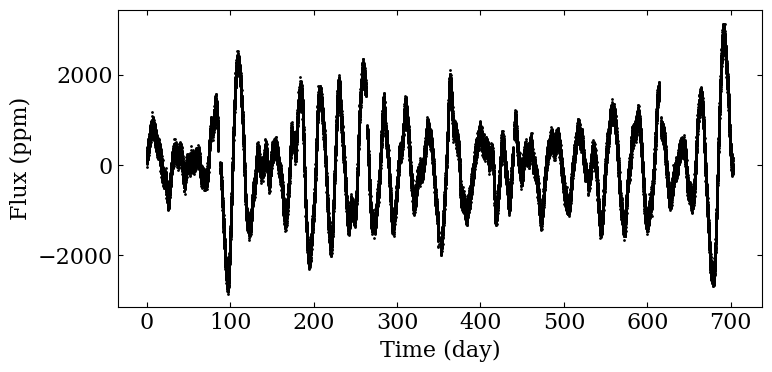

In [14]:
fig, ax = plt.subplots (1, 1, figsize=(8,4))

ax.scatter (t[s!=0]-t[0], s[s!=0], color='black', 
            marker='o', s=1)

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

fig.tight_layout ()

plt.savefig ('figures/plato_lc_filtered.png', dpi=300)

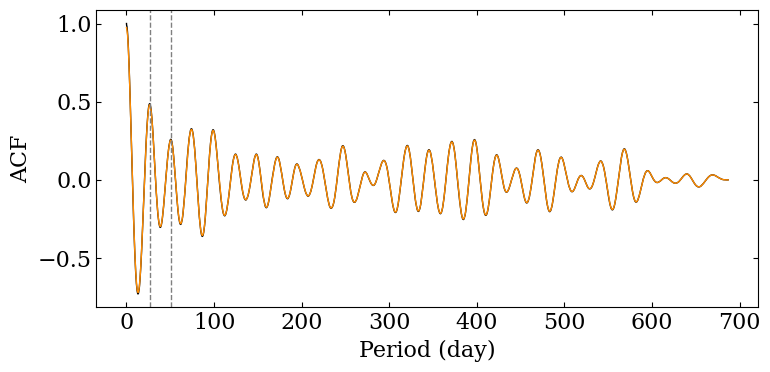

In [15]:
p_acf, acf = sp.compute_acf (s, dt, normalise=True)
(_, _, _, _, 
 prots, hacf, gacf,
 acf_smooth) = sp.find_period_acf (p_acf, acf, pcutoff=pcutoff,
                                   return_smoothed_acf=True)
fig = sp.plot_acf (p_acf, acf, prot=prots, 
                   acf_additional=acf_smooth,
                   color_additional="darkorange", 
                   filename='figures/acf_plato_short.png')

In [16]:
IDP_SAS_ACF_FILT_TIMESERIES = np.c_[p_acf, acf]
IDP_SAS_PROT_TIMESERIES = np.c_[prots, np.full (prots.size, -1), np.full (prots.size, -1),
                                hacf, gacf, np.arange (prots.size)+1]
np.savetxt ('data_products/IDP_SAS_PROT_TIMESERIES_PLATO.dat', 
            IDP_SAS_PROT_TIMESERIES)
np.savetxt ('data_products/IDP_SAS_ACF_FILT_TIMESERIES_PLATO.dat', 
            IDP_SAS_ACF_FILT_TIMESERIES)

## PLATO simulation: Long term modulation analysis

This time, we do not consider filtered out the data in order to consider long term modulations. We put a period threshold at 60 days to consider only long period in the postprocessing of our analysis. In the figure below, note that a Gaussian smoothing window is applied before looking for local maxima, shown in orange in the figure below.

In [17]:
p_acf, acf = sp.compute_acf (s0, dt, normalise=True, pthresh=pthresh, 
                            use_scipy_correlate=True, verbose=True)
(_, hacf, gacf, _, 
pmods, hacf, gacf, acf_smooth) = sp.find_period_acf (p_acf, acf, pthresh=pthresh,
                                                     return_smoothed_acf=True)
fig = sp.plot_acf (p_acf, acf, prot=pmods, 
                   acf_additional=acf_smooth,
                   color_additional="darkorange", 
                   filename="figures/acf_plato_long.png")

In [18]:
IDP_SAS_ACF_TIMESERIES = np.c_[p_acf, acf]
IDP_SAS_LONGTERM_MODULATION_TIMESERIES = np.c_[pmods, np.full (pmods.size, -1), np.full (pmods.size, -1),
                                                                hacf, gacf, np.arange (pmods.size)+1]
np.savetxt ('data_products/IDP_SAS_LONGTERM_MODULATION_TIMESERIES_PLATO.dat', 
            IDP_SAS_PROT_TIMESERIES)
np.savetxt ('data_products/IDP_SAS_ACF_TIMESERIES_PLATO.dat', 
            IDP_SAS_ACF_TIMESERIES)
df = pd.DataFrame (data=IDP_SAS_LONGTERM_MODULATION_TIMESERIES)
df

0    1    2         3         4    5
0  289.505092 -1.0 -1.0  0.301008  0.199352  1.0
1  309.199410 -1.0 -1.0  0.023280  0.229724  2.0
2  330.483996 -1.0 -1.0  0.200066  0.222273  3.0
3  584.308760 -1.0 -1.0  0.092116  0.065606  4.0
4  604.933628 -1.0 -1.0  0.029614  0.086868  5.0
5  653.718038 -1.0 -1.0  0.009202  0.050910  6.0

In [19]:
df.to_latex (buf='data_products/idp_msap4_02_idp_longterm_modulation_timeseries.tex', 
             formatters=['{:.2f}'.format, '{:.0f}'.format, '{:.0f}'.format,
                         '{:.2f}'.format, '{:.2f}'.format, '{:.0f}'.format,],  
             index=False, header=False)